## 음향 Augmentation

In [4]:
import random

import os
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
import librosa
import librosa.display

import IPython.display as idp

# 푸리에 변환을 위한 라이브러리
import math
from scipy.interpolate import splrep, splev

In [10]:
sample_path = 'C:\workspace\data\sample.wav'
example_path = 'C:\workspace\data\example.wav'
wait_path = 'C:\workspace\data\wait.wav'
input_path = 'C:\workspace\data\input.wav'
wdata, wrate = librosa.load(wait_path, mono=True, sr=44100)


In [11]:
def plot_time_series(wdata) : 
    fig=plt.figure(figsize=(4,4))
    plt.title('Raw wave')
    plt.ylabel('Amplitude 진폭')
    plt.plot(np.linspace(0,1,len(wdata)),wdata)
    plt.show()

(66156,)-[44100]


c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


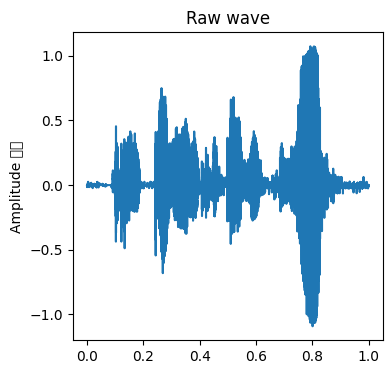

In [12]:
print(f'{wdata.shape}-[{wrate}]')
plot_time_series(wdata)
idp.Audio(data=wdata,rate=wrate)

# 1.White Noise
원본 데이터에 잡음 추가 : 모델이 학습을 할 때 너무 깨끗한 데이터만 학습하면 실제에서 잡음이 섞인 데이터가 들어오면 제대로 결과를 도출하지 못하기에 쓰는 방법

In [13]:
def add_white_noise(data, sr = 22050, noise_rate = 0.005):
    wn = np.random.randn(len(data)) # 데이터 길이를 이용한 임의의 값
    data_wn = data + noise_rate*wn
    plot_time_series(data_wn)
    sf.write('./'+'white_noise_wait.wav', data_wn,sr)
    return data_wn

c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\93end\miniconda3\envs\speechenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


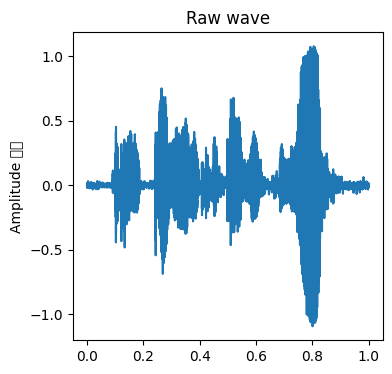

In [17]:
data_wn =add_white_noise(wdata, wrate)

data ,rate = librosa.load('C:\workspace\white_noise_wait.wav')
idp.Audio(data=data, rate=rate)